In [193]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [194]:
X,y=load_iris(return_X_y=True)
iris=load_iris()
data=pd.DataFrame(X,columns=iris.feature_names)
data['target']=y
data.head(2)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [195]:
mod=KNeighborsClassifier(n_neighbors=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
mod.fit(X_train,y_train)
y_pred=mod.predict(X_test)
X.shape

(150, 4)

0.9666666666666667

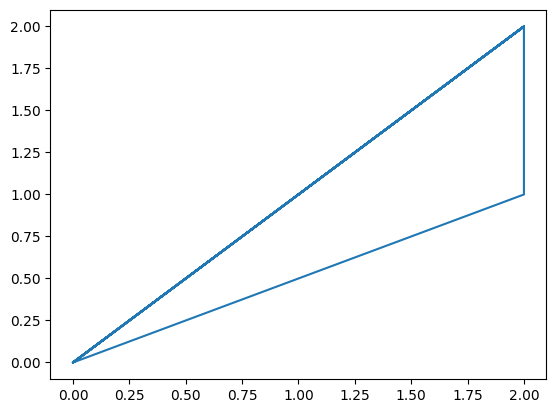

In [196]:
plt.plot(y_pred,y_test)
accuracy_score(y_test,y_pred)

In [197]:
from collections import Counter
class myknn:
    def __init__(self,k=3):
        self.k=k
    def fit(self,X,y):
        self.X_train=np.array(X)
        self.y_train=np.array(y)
    def predict(self,X):
        X=np.array(X)
        return [self._predict(i) for i in X]
    def _predict(self,x):
        distance = [np.linalg.norm(x-x_train) for x_train in self.X_train]

        k_indices=np.argsort(distance)[:self.k]
        k_nearest_labels= [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    

In [198]:
mod1=myknn()
mod1.fit(X_train,y_train)
mod1.predict(X_test)


[np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(0)]

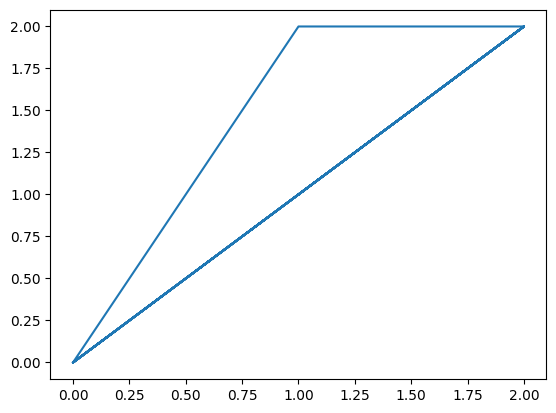

In [199]:
plt.plot(y_test,y_pred)

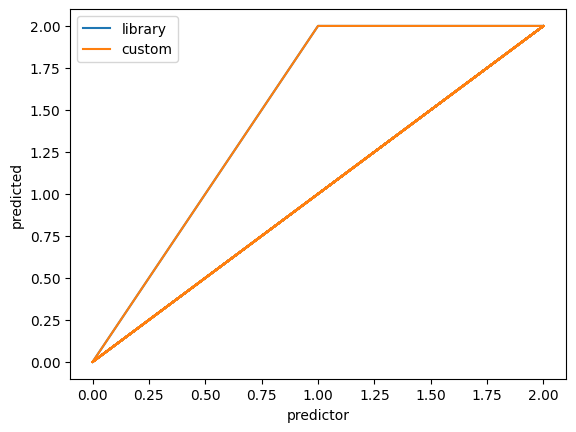

In [200]:
mod1=KNeighborsClassifier()
mod2=myknn()

mod1.fit(X_train,y_train)
y_pred_lib=mod1.predict(X_test)
mod2.fit(X_train,y_train)
y_pred_custom=mod2.predict(X_test)

plt.plot(y_test,y_pred_lib,label='library')
plt.plot(y_test,y_pred_custom,label='custom')
plt.xlabel('predictor')
plt.ylabel('predicted')
plt.legend()
plt.show()

In [201]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor


In [202]:
data=pd.read_csv('House_Pricing.csv')

X=data.drop(columns=['Sale Price'])
X=data.select_dtypes(include='number')
y=data['Sale Price']
X.isna().sum()
a=X.columns.to_list()

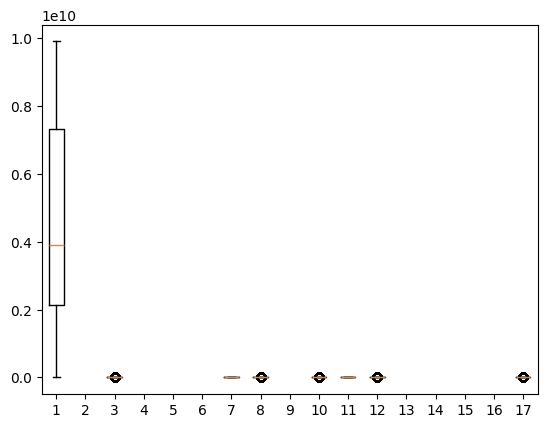

In [203]:
plt.boxplot(X)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def outlier(df,col_name):
    q1=df[col_name].quantile(0.25)
    q3=df[col_name].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q1+(1.5*iqr)
    df[col_name]=df[col_name].clip(upper=ub)
    df[col_name]=df[col_name].clip(lower=lb)
    return df[col_name]
for col_name in a:
    X[col_name]=outlier(X,col_name)






num = Pipeline(steps=[
    ('imp',SimpleImputer(strategy='median'))
    
    ])
model=Pipeline(steps=[
    ('num',num),
    ('mod',KNeighborsRegressor(n_neighbors=3))
])

In [204]:
y.fillna(y.median(),inplace=True)
y.isna().sum()

np.int64(0)

In [205]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [206]:

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mean_squared_error(y_test,y_pred)
r2_score(y_test,y_pred)


0.4599940967173386

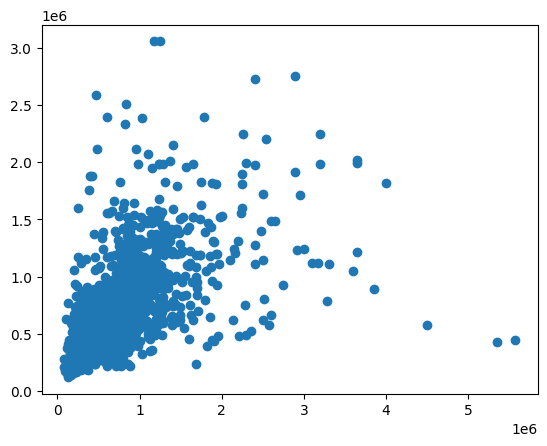

In [207]:
plt.scatter(y_test,y_pred)

In [208]:
class knnregressor:
    def __init__(self,k=3):
        self.k=k
    def fit(self,X,y):
        self.X_train=np.array(X)
        self.y_train=np.array(y)
    def predict(self,X):
        X=np.array(X)
        return [self._predict(x) for x in X]
    def _predict(self,x):
        distance = [np.linalg.norm(x-x_train) for x_train in self.X_train]
        k_indices=np.argsort(distance)[:self.k]
        k_nearest_labels=[self.y_train[i] for i in k_indices]
        return np.mean(k_nearest_labels)

In [209]:
mod1=knnregressor()
mod1.fit(X_train,y_train)
y_pred1=mod1.predict(X_test)

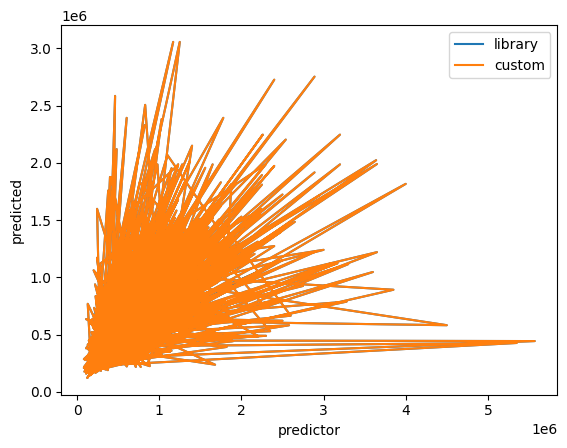

In [210]:
plt.plot(y_test,y_pred,label='library')
plt.plot(y_test,y_pred1,label='custom')
plt.xlabel('predictor')
plt.ylabel('predicted')
plt.legend()
plt.show()

In [213]:
mean_squared_error(y_test,y_pred1)
c=r2_score(y_test,y_pred1)
mean_squared_error(y_test,y_pred)
d=r2_score(y_test,y_pred)
print(c,d)

0.4586497614722691 0.4599940967173386


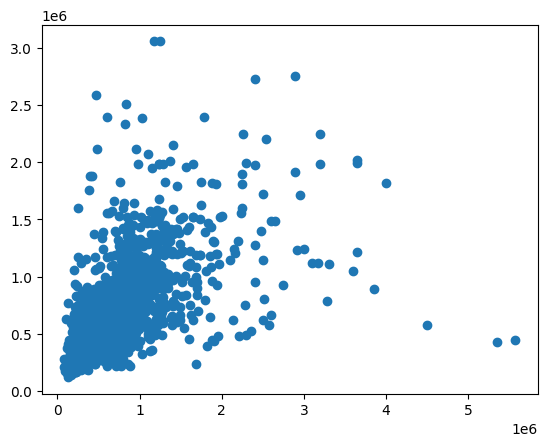

In [214]:
plt.scatter(y_test,y_pred1)

In [ ]:

data1=pd.read_csv('churn_data.csv')
X=data1.drop(columns=['churn'])
X=X.select_dtypes(include='number')
y=data1['churn']
X.isna().sum()


satisfaction             9
evaluation              63
average_montly_hours    26
dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [ ]:
from sklearn.svm import SVC,SVR

model=Pipeline(steps=[
    ('imp',SimpleImputer(strategy='median')),
    ('mod',SVC(kernel='linear'))
])
model.fit(X_train,y_train)


,steps,"[('imp', ...), ('mod', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,C,1.0


In [237]:
from sklearn.metrics import precision_score,confusion_matrix
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred, pos_label='yes'))
print(confusion_matrix(y_pred,y_test))



0.7056666666666667
0.34338358458961477
[[1912  491]
 [ 392  205]]
